#### QUESTION 1: Report the dimensions of the TF-IDF matrix you get

In [84]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# load dataset
twenty_train = fetch_20newsgroups(subset='all', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  categories=categories,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                  remove=['headers', 'footers'],
                                 )
# twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [85]:
# split categories into binary classes (1 = class 1, 2 = class 2)
binary_class = []
for target in twenty_train.target:
    if target < 4:
        binary_class.append(1)
    else:
        binary_class.append(2)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(min_df=3)
count_vect = CountVectorizer(min_df=3, stop_words='english')
# count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape # 1162 docs, 19610 terms in the training dataset

(7882, 23522)

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# recall that X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print("The shape of the TFIDF matrix is:",X_train_tfidf.shape)

The shape of the TFIDF matrix is: (7882, 23522)


#### Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random state, max iter and n init. Please use random state=0, max iter ≥ 1000 and n init ≥ 301. Compare the clustering results with the known class labels. (you can refer to sklearn - Clustering text documents using k-means for a basic work flow)

In [102]:
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

# Clustering
km = KMeans(random_state=0, n_clusters=2, init='k-means++', max_iter=1000, n_init=301)

print("Clustering sparse data with %s" % km)
km.fit(X_train_tfidf)


Clustering sparse data with KMeans(max_iter=1000, n_clusters=2, n_init=301, random_state=0)


KMeans(max_iter=1000, n_clusters=2, n_init=301, random_state=0)

#### QUESTION 2: Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix.


In [103]:
from sklearn import metrics

contingency_matrix = metrics.cluster.contingency_matrix(binary_class, km.labels_)
print("Contingency matrix:\n", contingency_matrix)

Contingency matrix:
 [[ 758 3145]
 [3928   51]]


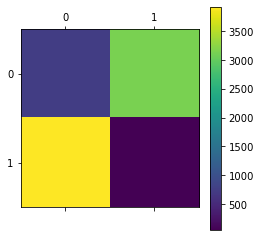

In [104]:
import matplotlib.pyplot as plt

# Visualize Contingency Matrix
plt.matshow(contingency_matrix)
plt.colorbar()
plt.show()

#### QUESTION 3: Report the 5 measures above for the K-means clustering results you get.

In [105]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(binary_class, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(binary_class, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(binary_class, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(binary_class, km.labels_))
print("Adjusted Mutual Information Score: %.3f"
     % metrics.adjusted_mutual_info_score(binary_class, km.labels_))
print()

Homogeneity: 0.572
Completeness: 0.588
V-measure: 0.580
Adjusted Rand-Index: 0.632
Adjusted Mutual Information Score: 0.580



#### QUESTION 4: Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000.

In [106]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# fit SVD model to 1000 components
SVD = TruncatedSVD(n_components=1000)
SVD.fit_transform(X_train_tfidf)

array([[ 0.13202992,  0.0013572 , -0.01187849, ...,  0.02316355,
         0.00697644, -0.00694627],
       [ 0.13071614, -0.05379625, -0.05736558, ...,  0.01060341,
         0.00991633, -0.01756071],
       [ 0.1574049 , -0.12033844,  0.11969389, ...,  0.0011844 ,
        -0.00457041,  0.00374421],
       ...,
       [ 0.07522627,  0.01059875, -0.01102102, ...,  0.02091637,
        -0.00445344,  0.03491214],
       [ 0.15158911,  0.01446036, -0.00536385, ...,  0.00700366,
         0.00679561,  0.01239273],
       [ 0.06821521,  0.01989866,  0.01911755, ..., -0.02385774,
         0.00438184,  0.02878119]])

In [107]:
# function to plot 5 measure scores
def scatter_plot_scores(x,y,xlabel,ylabel):
    plt.figure()
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
def bar_plot_scores(x,y,xlabel,ylabel):
    plt.figure()
    plt.bar(x,y, width=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    

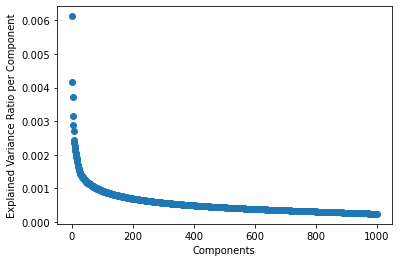

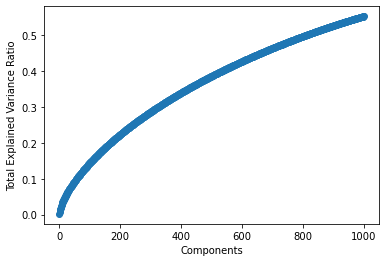

In [108]:
# plot explained variance ratio per component
scatter_plot_scores(np.arange(1000)+1, sorted(SVD.explained_variance_ratio_,reverse=True), "Components", "Explained Variance Ratio per Component")
scatter_plot_scores(np.arange(1000)+1, np.cumsum(SVD.explained_variance_ratio_), "Components", "Total Explained Variance Ratio")

#### QUESTION 5: Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1, 2, 3, 5, 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively. 
###### Note: In the choice of r, there is a trade-off between the information preservation, and better performance of k-means in lower dimensions.

#### SVD

In [95]:
r = [1,2,3,5,10,20,50,100,300]

homogeneity_scores = []
completeness_scores = []
vmeasure_scores = []
adjrand_scores = []
adjMI_scores = []

for component in r:
    SVD = TruncatedSVD(n_components=component)
    predicted = km.fit_predict(SVD.fit_transform(X_train_tfidf))
    
    homogeneity_scores.append(metrics.homogeneity_score(binary_class, predicted))
    completeness_scores.append(metrics.completeness_score(binary_class, predicted))
    vmeasure_scores.append(metrics.v_measure_score(binary_class, predicted))
    adjrand_scores.append(metrics.adjusted_rand_score(binary_class, predicted))
    adjMI_scores.append(metrics.adjusted_mutual_info_score(binary_class, predicted))
    

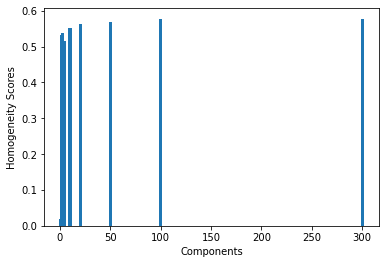

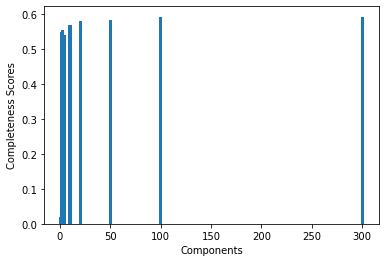

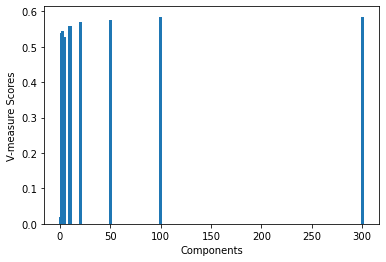

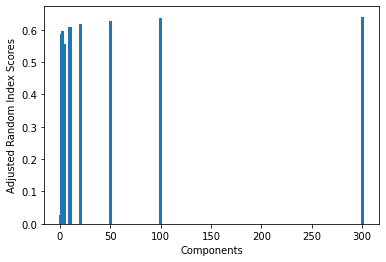

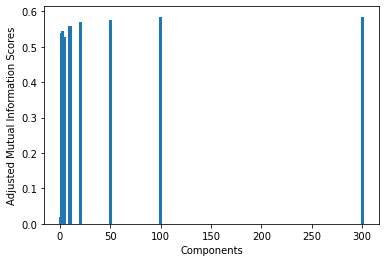

In [96]:
bar_plot_scores(r, homogeneity_scores, "Components", "Homogeneity Scores")
bar_plot_scores(r, completeness_scores, "Components", "Completeness Scores")
bar_plot_scores(r, vmeasure_scores, "Components", "V-measure Scores")
bar_plot_scores(r, adjrand_scores, "Components", "Adjusted Random Index Scores")
bar_plot_scores(r, adjMI_scores, "Components", "Adjusted Mutual Information Scores")

#### NMF

In [97]:
from sklearn.decomposition import NMF

homogeneity_scores = []
completeness_scores = []
vmeasure_scores = []
adjrand_scores = []
adjMI_scores = []

for component in r:
    nmf = NMF(n_components=component, init='random')
    predicted = km.fit_predict(nmf.fit_transform(X_train_tfidf))
    
    homogeneity_scores.append(metrics.homogeneity_score(binary_class, predicted))
    completeness_scores.append(metrics.completeness_score(binary_class, predicted))
    vmeasure_scores.append(metrics.v_measure_score(binary_class, predicted))
    adjrand_scores.append(metrics.adjusted_rand_score(binary_class, predicted))
    adjMI_scores.append(metrics.adjusted_mutual_info_score(binary_class, predicted))

C:\Users\Julia\Anaconda3\envs\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


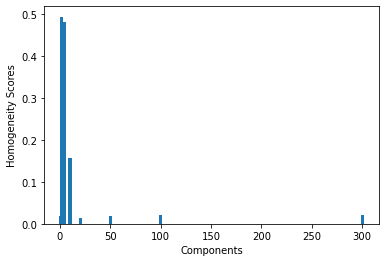

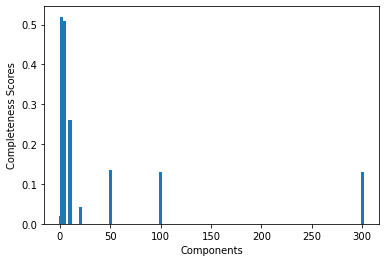

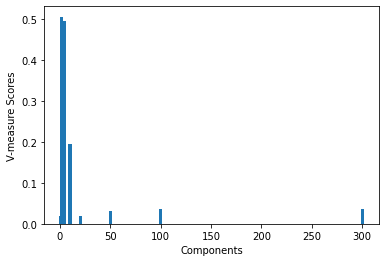

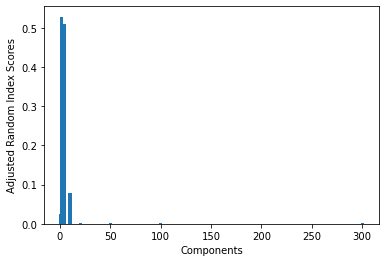

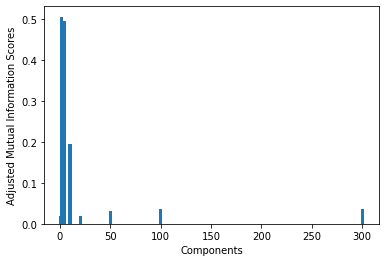

In [98]:
bar_plot_scores(r, homogeneity_scores, "Components", "Homogeneity Scores")
bar_plot_scores(r, completeness_scores, "Components", "Completeness Scores")
bar_plot_scores(r, vmeasure_scores, "Components", "V-measure Scores")
bar_plot_scores(r, adjrand_scores, "Components", "Adjusted Random Index Scores")
bar_plot_scores(r, adjMI_scores, "Components", "Adjusted Mutual Information Scores")

#### QUESTION 6: How do you explain the non-monotonic behavior of the measures as r increases?

For both the SVD and NMF plots, all 5 measure scores initially peak, and then slowly decrease as the number of components increases. This non-monotonic behavior can be explained because KMeans does not perform well with high dimensionality. KMeans clustering uses the Euclidean distance, which is not a good metric anymore for highly dimensional data because the distances between data points tends to be almost the same. Similarly, if the clusters are not round-shaped, KMeans can fail to identify the clusters properly. Therefore, the scores become increasingly lower as the dimensionality increases. 

#### QUESTION 7: Visualize the clustering results for:<br>• SVD with your choice of r<br>• NMF with your choice of r

For SVD and NMF, we can see from the plot above that the best r is r=2

No handles with labels found to put in legend.


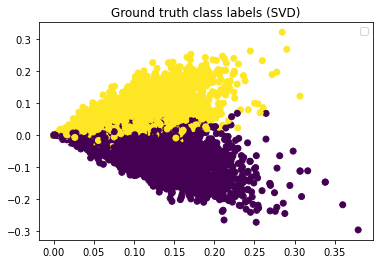

In [99]:
SVD = TruncatedSVD(n_components=2)
svd_train = SVD.fit_transform(X_train_tfidf)

plt.figure()
plt.scatter(svd_train[:,0],svd_train[:,1], c=binary_class)
plt.title("Ground truth class labels (SVD)")
plt.legend()

No handles with labels found to put in legend.


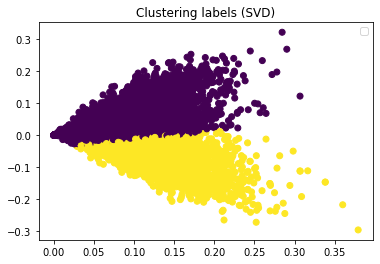

In [100]:
SVD = TruncatedSVD(n_components=2)
predicted = km.fit_predict(SVD.fit_transform(X_train_tfidf))

plt.figure()
plt.scatter(svd_train[:,0],svd_train[:,1], c=predicted)
plt.title("Clustering labels (SVD)")
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


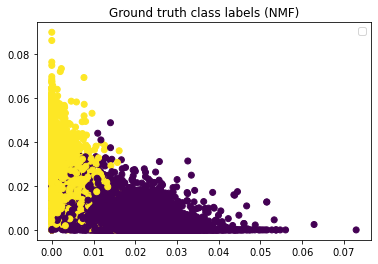

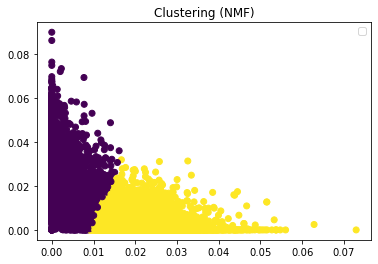

In [101]:
nmf = NMF(n_components=2, init='random')
nmf_train = nmf.fit_transform(X_train_tfidf)

plt.figure()
plt.scatter(nmf_train[:,0],nmf_train[:,1], c=binary_class)
plt.title("Ground truth class labels (NMF)")
plt.legend()

nmf = NMF(n_components=2, init='random')
predicted = km.fit_predict(nmf.fit_transform(X_train_tfidf))

plt.figure()
plt.scatter(nmf_train[:,0],nmf_train[:,1], c=predicted)
plt.title("Clustering (NMF)")
plt.legend()

#### QUESTION 8: What do you observe in the visualization? How are the data points of the two classes distributed? Is the data distribution ideal for K-Means clustering?


In the visualization, we can see that with r=2, for SVD, the distribution ranges from -.3 to .3. For NMF, the distribution ranges from 0 to .12. For both SVD and NMF, the classes seem to be evenly distributed, as seen in the plots above from the distribution of purple and yellow points (each class) being similar. For SVD, the data distribution is more ideal than NMF since the data points are in a round-like shape, whereas the NMF data distribution is almost triangular. Because KMeans clustering performs better under round-like shapes, SVD would be a more ideal data distribution.